#### USA Houseprices - Excercise 1 - Timothy Gregorian

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [65]:
# No categorial variables, only numerical values
df =pd.read_csv("usa_housing_realistic.csv")
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,768057,4,1.7,2847,1972,2,1.46,75201,37.28,10
1,712254,5,3.3,2740,1964,1,1.66,30301,39.89,1
2,713762,3,2.4,3163,1966,2,0.99,30301,84.57,3
3,881840,5,2.7,3306,1963,2,1.29,60601,49.06,5
4,881072,5,2.9,3591,1965,1,1.54,30301,53.41,4


In [66]:
print(df.shape)
print("\n")
print(df.info())
print("\n")
print(df.describe())

(5000, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         5000 non-null   int64  
 1   Bedrooms      5000 non-null   int64  
 2   Bathrooms     5000 non-null   float64
 3   SquareFeet    5000 non-null   int64  
 4   YearBuilt     5000 non-null   int64  
 5   GarageSpaces  5000 non-null   int64  
 6   LotSize       5000 non-null   float64
 7   ZipCode       5000 non-null   int64  
 8   CrimeRate     5000 non-null   float64
 9   SchoolRating  5000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 390.8 KB
None


              Price     Bedrooms    Bathrooms   SquareFeet    YearBuilt  \
count  5.000000e+03  5000.000000  5000.000000  5000.000000  5000.000000   
mean   6.907359e+05     3.010800     2.890500  2704.120200  1985.472200   
std    1.835829e+05     1.424601     0.661585   746.768298    21.087384   
min  

In [67]:
print("Amount of data in the dataset: ")
len(df)

Amount of data in the dataset: 


5000

#### Clean the dataset and handle mising values

In [68]:
df.isna().sum()

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

#### Check if there are any duplicates

In [69]:
print("Duplicates: ")
duplicates = int(df.duplicated().sum())
duplicates

Duplicates: 


0

#### X/y -Split

In [46]:
# Independent Variable List:
# Bedrooms
# Bathrooms
# Squarefeet
# YearBuilt
# GarageSpaces
# LotSize
# ZipCode -> Careful! This is a categorial variable
# CrimeRate
# SchoolRating

# Dependent Variables:
# Price -> Training the model to predict this variable

In [70]:
# Save every independent variable in X, except for "price"

y = df["Price"]

X = df.drop(["Price", "ZipCode"], axis=1)

#### Train/Test/Validation - Split

In [71]:
# Data splitted into 70% training data and 30% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# Temporary data splitted into 15% test data and 15% validation data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Training size: (3500, 8)
Validation size: (750, 8)
Test size: (750, 8)


In [72]:
from sklearn.preprocessing import StandardScaler

# Initialisiere den Scaler
scaler = StandardScaler()

# Fit nur mit Trainingsdaten, dann transformiere alle Sets
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


#### Create a neural network structure

In [75]:
variable_amount = len(X.columns)

training_model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1)
    ]
)

training_model.compile(optimizer="adam", loss="mse")

training_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_7           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 16 (64.00 B)

#### Train the neural network

In [76]:
training_model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 515227025408.0000 - val_loss: 496540057600.0000
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 515212607488.0000 - val_loss: 496504438784.0000
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 515103490048.0000 - val_loss: 496276766720.0000
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514567536640.0000 - val_loss: 495318925312.0000
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 512702447616.0000 - val_loss: 492368297984.0000
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 507697856512.0000 - val_loss: 485245222912.0000
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 496912105472.0000 - val_loss: 471037739008.0000
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 477205561344.0000 - val_loss: 446864949248.0000
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 445707878400.0000 - val_loss: 410085883904.0000
Epoch 10/100
110/11

#### Performance and Error Metrics

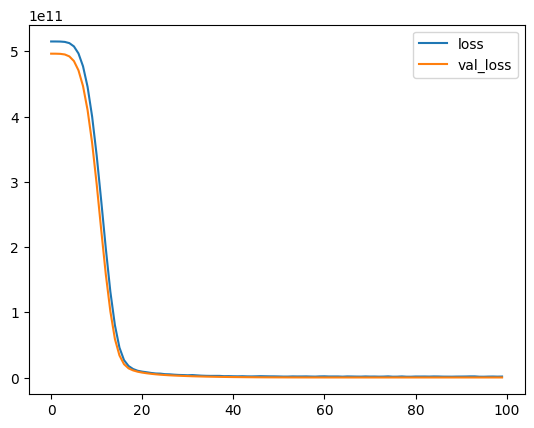

In [77]:
loss_df = pd.DataFrame(training_model.history.history)
loss_df.plot()
plt.show()

#### Trying the model and predict the price with new house data

In [78]:
print("Test data evaluation")
print(training_model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(training_model.evaluate(X_train, y_train, verbose=0))

Test data evaluation
425133664.0

Train data evaluation:
392716864.0


In [79]:
import seaborn as sns

# Predictions für Testdaten
test_predictions = training_model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))

# DataFrame mit echten & predicted Werten
pred_df = pd.DataFrame(pd.DataFrame(np.asarray(y_test), columns=["Test True Y"]))
pred_df = pd.concat([pred_df, test_predictions], axis = 1)
pred_df.columns = ["Test True Y", "Model Predictions"]

pred_df

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Test True Y,Model Predictions
0,391706,404599.71875
1,886943,899896.81250
2,937405,935439.50000
3,793665,784325.87500
4,750631,756604.06250
...,...,...
745,626995,657889.56250
746,585477,571595.93750
747,755176,786200.25000
748,434534,437269.00000


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

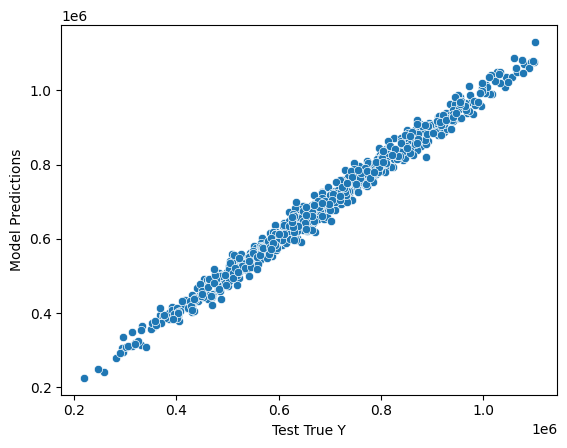

In [80]:
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)

In [81]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
16651.32 $

MSE
425133600.0 $^2

RMSE:
20618.77 $

R-squared:
0.99

Explained variance score:
0.99


C:\Users\Timothy\AppData\Local\Temp\ipykernel_11640\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


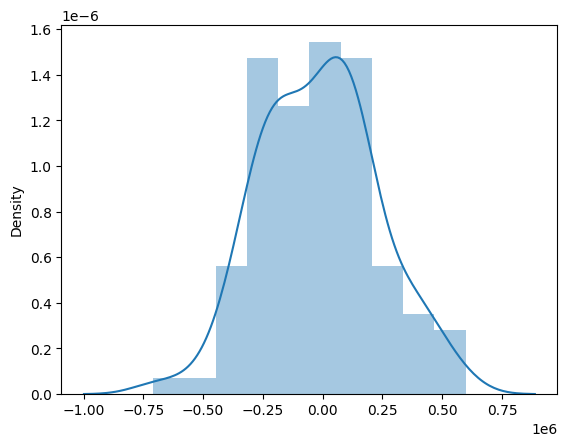

In [40]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

#### Trying the model in practice with new imaginary house

#### Conclusion